In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
from scipy.stats import zscore
import math
from sklearn.decomposition import DictionaryLearning
from sklearn.decomposition import PCA
from sktime.classification.dictionary_based import IndividualTDE
from sklearn import preprocessing
from sklearn.linear_model import orthogonal_mp
from sklearn.linear_model import lasso_path
from sklearn.linear_model import lars_path
from pandasgui import show
import pickle
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib import rc
import mvnx

In [3]:
# joint28 = scipy.io.loadmat('Session_011_Joint28.mat')
# joint29 = scipy.io.loadmat('Session_011_Joint29.mat')
# joint30 = scipy.io.loadmat('Session_011_Joint30.mat')


# joint28 = np.array(joint28['output_session011_28'])
# joint28 = joint28.reshape(-1)
# joint29 = np.array(joint29['output_session011_29'])
# joint29 = joint29.reshape(-1)
# joint30 = np.array(joint30['output_session011_30'])
# joint30 = joint30.reshape(-1)

# plt.plot(joint28, label='X axis')
# plt.plot(joint29, label='Y axis')
# plt.plot(joint30, label='Z axis')
# plt.xlabel('Frames(60Hz)')
# plt.ylabel('Joint Angles')
# plt.legend()
# plt.show()
# plt.plot(joint28[3300:3800], label='X axis')
# plt.xlabel('Frames(60Hz)')
# plt.ylabel('Joint Angles')
# plt.legend()
# plt.show()


In [6]:
master_data = scipy.io.loadmat('EVD_R_MASTER_010_SM.mat')
acc_data = np.array(master_data['acceleration']) #0
angAcc_data = np.array(master_data['angularAcceleration']) #1
angVel_data = np.array(master_data['angularVelocity']) #2
joint_data = np.array(master_data['jointAngle']) #3
orient_data = np.array(master_data['orientation']) #4
pos_data = np.array(master_data['position']) #5
vel_data = np.array(master_data['velocity']) #6

data_params = np.array(['Acceleration', 'Angular Acceleration', 'Angular Velocity', 'Joint Angles', 'Orientation', 'Position', 'Velocity'])
master_data = np.array([acc_data, angAcc_data, angVel_data, joint_data, orient_data, pos_data, vel_data])



C:\Users\abdul\AppData\Local\Temp\ipykernel_15940\2518026823.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  master_data = np.array([acc_data, angAcc_data, angVel_data, joint_data, orient_data, pos_data, vel_data])


In [4]:
# np.savetxt("dictionary-learning-main\dictionary-learning-main\input_data\Acc_Data.csv", acc_data, delimiter=",")
# np.savetxt("dictionary-learning-main\dictionary-learning-main\input_data\AngAcc_Data.csv", angAcc_data, delimiter=",")
# np.savetxt("dictionary-learning-main\dictionary-learning-main\input_data\AngVel_Data.csv", angVel_data, delimiter=",")
# np.savetxt("dictionary-learning-main\dictionary-learning-main\input_data\joint_Data.csv", joint_data, delimiter=",")
# np.savetxt("dictionary-learning-main\dictionary-learning-main\input_data\Orient_Data.csv", orient_data, delimiter=",")
# np.savetxt("dictionary-learning-main\dictionary-learning-main\input_data\Pos_Data.csv", pos_data, delimiter=",")
# np.savetxt("dictionary-learning-main\dictionary-learning-main\input_data\Vel_Data.csv", vel_data, delimiter=",")


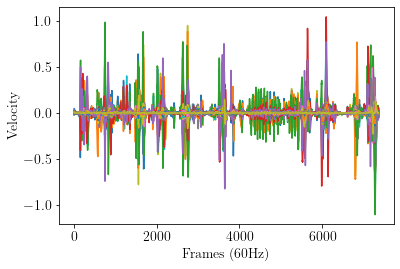

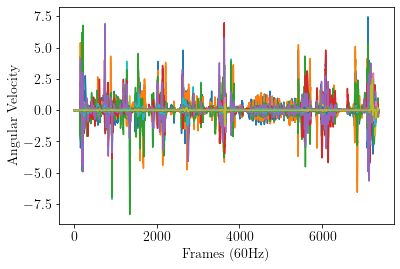

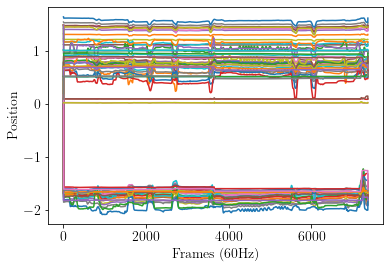

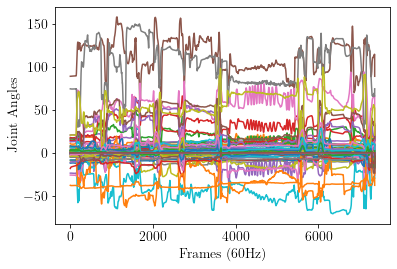

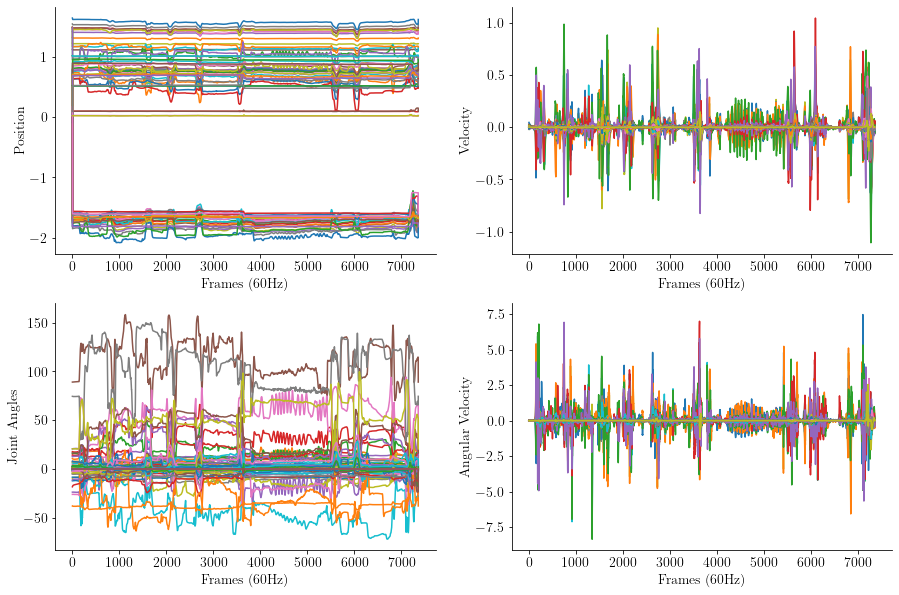

In [10]:
#vel_data = np.genfromtxt('\Vel_Data.csv', delimiter=',')
font = {'family' : 'normal',
        'size'   : 14}

plt.rc('font', **font)


plt.plot(vel_data)
plt.xlabel('Frames (60Hz)')
plt.ylabel('Velocity')
plt.show()
plt.plot(angVel_data)
plt.xlabel('Frames (60Hz)')
plt.ylabel('Angular Velocity')
plt.show()
plt.plot(pos_data)
plt.xlabel('Frames (60Hz)')
plt.ylabel('Position')
plt.show()
plt.plot(joint_data)
plt.xlabel('Frames (60Hz)')
plt.ylabel('Joint Angles')
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0,0].plot(pos_data)
axs[0,0].set_xlabel('Frames (60Hz)')
axs[0,0].set_ylabel('Position', fontsize=14)
axs[0,0].spines['right'].set_visible(False)
axs[0,0].spines['top'].set_visible(False)

axs[0,1].plot(vel_data)
axs[0,1].set_xlabel('Frames (60Hz)', fontsize=14)
axs[0,1].set_ylabel('Velocity', fontsize=14)
axs[0,1].spines['right'].set_visible(False)
axs[0,1].spines['top'].set_visible(False)

axs[1,0].plot(joint_data)
axs[1,0].set_xlabel('Frames (60Hz)', fontsize=14)
axs[1,0].set_ylabel('Joint Angles', fontsize=14)
axs[1,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)

axs[1,1].plot(angVel_data)
axs[1,1].set_xlabel('Frames (60Hz)', fontsize=14)
axs[1,1].set_ylabel('Angular Velocity', fontsize=14)
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)

plt.show()

In [6]:
# xyz = [27,28,29]
# param = 3

# plt.plot(master_data[param][:,xyz[0]], label='x-axis')
# plt.plot(master_data[param][:,xyz[1]], label='y-axis')
# plt.plot(master_data[param][:,xyz[2]], label='z-axis')
# plt.xlabel('Time')
# plt.ylabel(data_params[param])
# plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
# plt.show()

# xyz = [39,40,41]
# plt.plot(master_data[param][:,xyz[0]], label='x-axis')
# plt.plot(master_data[param][:,xyz[1]], label='y-axis')
# plt.plot(master_data[param][:,xyz[2]], label='z-axis')
# plt.xlabel('Time')
# plt.ylabel(data_params[param])
# plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
# plt.show()

In [7]:
def calculate_reconstruction_score(data,reconstruction):
    score = 1 - np.var(data-reconstruction)/np.var(data)
    return score 

# This function takes in the eigenmotions dictionary and reconstructs with the best eigenmotion at each timestep
# Greedy sequence is then generated which consists of indices of the most significant eigenmotions at each timestep
def test_eigenmotions_omp(test_actions, eigenmotions, num_coefs=1):
    reconstructions = np.zeros(test_actions.shape)
    greedy_sequence = np.zeros(len(test_actions))
    scores = np.zeros(len(test_actions))

    for i in range(len(test_actions)):
        print("datapoint: {}".format(i), end="\r")
        X = eigenmotions
        X = X.T
        y = test_actions[i].reshape(-1,1)
        z = orthogonal_mp(X,y, n_nonzero_coefs=num_coefs)
        # if i == 0:
        #     print(z)
        #     fb = z[np.nonzero(z)[0]].reshape(-1,1)
        #     cb = eigenmotions[np.nonzero(z)[0]].reshape(1,-1)
        #     print(fb.shape)
        #     print(cb.shape)


        # Find the idx of the most significant eigenmotion
        max_idx = np.argmax(abs(z))
        # Reconstruct with the most significant eigenmotion
        
        reconstructions[i] = np.dot(z[np.nonzero(z)].reshape(-1,1), eigenmotions[max_idx].reshape(1,-1))
        scores[i] = abs(calculate_reconstruction_score(y.ravel(),reconstructions[i]))
        # Create greedy sequence of eigenmotions with the most significant indices
        greedy_sequence[i] = int(max_idx) 

    # print("Average reconstruction score: ", np.sum(scores)/len(test_actions))
    # print("=============================================")
    
    error = np.mean(np.sum((reconstructions - test_actions) ** 2, axis=1) / np.sum(test_actions ** 2, axis=1))
    
    return greedy_sequence, reconstructions, np.sum(scores)/len(test_actions), error

def test_eigenmotions_omp_vaf(test_actions, eigenmotions, num_coefs=1):
    reconstructions = np.zeros(test_actions.shape)
    scores = np.zeros(len(test_actions))
    vaf_scores = np.zeros(len(eigenmotions))
    vaf_sums = np.zeros(len(eigenmotions))

    for e in range(len(eigenmotions)):
        for i in range(len(test_actions)):
            print("datapoint: {}".format(i), end="\r")
            X = eigenmotions[e]
            X = X.T
            X = X.reshape(-1, 1)
            y = test_actions[i].reshape(-1,1)
            z = orthogonal_mp(X,y, n_nonzero_coefs=num_coefs)
            # Find the idx of the most significant eigenmotion
            # Reconstruct with the most significant eigenmotion
            
            reconstructions[i] = np.dot(z, eigenmotions[e].reshape(1,-1))
            scores[i] = abs(calculate_reconstruction_score(y.ravel(),reconstructions[i]))
        vaf_scores[e] =  np.sum(scores)/len(test_actions)
        vaf_sums[e] = np.sum(scores)

    
    return vaf_scores, vaf_sums


def test_eigenmotions_lasso_lars(test_actions, eigenmotions, t_alpha=0.05, dims=69):
    dict_learner = DictionaryLearning(n_components=dims, alpha=1, transform_algorithm='lasso_lars', transform_alpha=t_alpha, random_state=42)
    dict_learner.components_ = eigenmotions
    transformed = dict_learner.transform(test_actions)

    X_hat = transformed @ dict_learner.components_
    error = np.mean(np.sum((X_hat - test_actions) ** 2, axis=1) / np.sum(test_actions ** 2, axis=1))
    recon = calculate_reconstruction_score(test_actions, X_hat)

    return transformed, X_hat, recon, error



In [8]:
standard_scaler = preprocessing.StandardScaler()
min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler.fit(vel_data)
vel_scaled = standard_scaler.transform(vel_data)

min_max_scaler.fit(vel_data)
vel_norm = min_max_scaler.transform(vel_data)

min_max_scaler.fit(vel_scaled)
vel_norm_scaled = min_max_scaler.transform(vel_scaled)

mean = np.mean(vel_data, axis=0)
vel_zero = vel_data - mean

min_max_scaler.fit(vel_zero)
vel_norm_zero = min_max_scaler.transform(vel_zero)

min_max_scaler.fit(vel_data)
vel_norm = min_max_scaler.transform(vel_data)


#min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
#min_max_scaler.fit(vel_norm)
#vel_rev_norm = min_max_scaler.transform(vel_norm)
vel_rev_norm = min_max_scaler.inverse_transform(vel_norm)


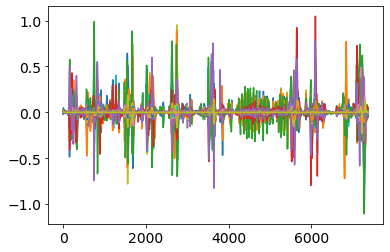

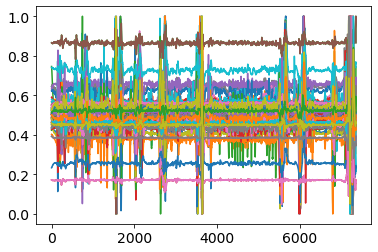

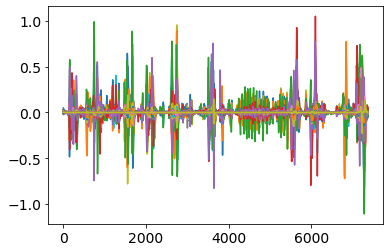

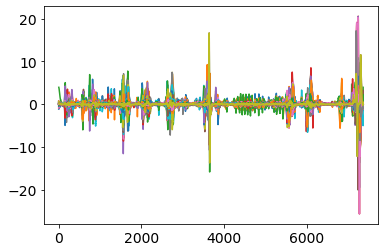

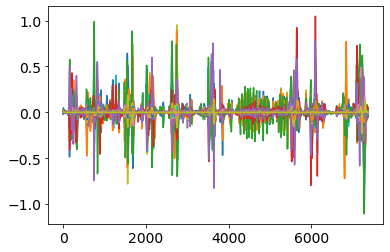

In [9]:
plt.plot(vel_data)
plt.show()
plt.plot(vel_norm)
plt.show()
plt.plot(vel_zero)
plt.show()
plt.plot(vel_scaled)
plt.show()
plt.plot(vel_rev_norm)
plt.show()

In [10]:
def do_PCA(training_data, mean, labels='Data', mean_control=False, norm_control=False):
    
    min_max_scaler = preprocessing.MinMaxScaler()
    pca = PCA(n_components=66,  random_state=42)
    vel_comp = pca.fit(training_data)
    vel_trans = pca.transform(training_data)

    #pca.explained_variance_
    variance_exp = np.zeros((69, 1))

    p_ratio = np.sum(pca.explained_variance_) ** 2 / np.sum(pca.explained_variance_ ** 2)#participation ratio

    #print(pca.components_)

    if mean_control:
        X_hat = vel_trans @ pca.components_ + mean  ##########
    else:
        X_hat = vel_trans @ pca.components_

    if norm_control:
        min_max_scaler.fit(X_hat)
        X_hat = min_max_scaler.transform(X_hat)

    reconstruction_scores = np.mean(1 - np.var(training_data-X_hat,axis=1)/np.var(training_data,axis=1))
    #print(labels + " " + str(reconstruction_scores))

    #print(p_ratio)

    for i in range(len(pca.explained_variance_ratio_)):
        if(i == 0):
            pca.explained_variance_ratio_[i] = pca.explained_variance_ratio_[i]
        else:
            pca.explained_variance_ratio_[i] = pca.explained_variance_ratio_[i] + pca.explained_variance_ratio_[i-1]

    #print(pca.explained_variance_ratio_)

    num_pcas = np.argwhere(pca.explained_variance_ratio_ > 0.8)[0][0]
    #print(labels + " " + str(num_pcas+1))

    #print(pca.explained_variance_ratio_)

    # t = list(range(1,70))
    # plt.plot(t, pca.explained_variance_ratio_, label=labels)

    # plt.legend()
    # plt.show()

    # plt.plot(X_hat)
    # plt.show()

    # plt.plot(training_data)
    # plt.show()

    return X_hat, pca.explained_variance_ratio_, pca.components_, vel_trans, pca.get_covariance()
    #return pca.explained_variance_ratio_

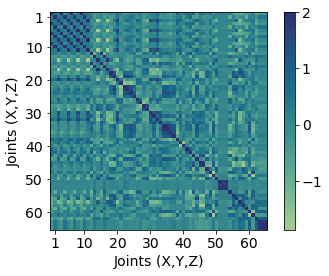

In [11]:
cmaps = sns.color_palette("crest", as_cmap=True)
joint_cov = np.cov(zscore(joint_data).T)
joint_cov = joint_cov*2
plt.imshow(joint_cov, cmap=cmaps)
cbar = plt.colorbar(ticks=[-2,-1,0,1,2])
plt.xlabel("Joints (X,Y,Z)", fontsize=14)
plt.ylabel("Joints (X,Y,Z)", fontsize=14)
g=[1,10,20,30,40,50,60]
plt.xticks(g)
g=[1,10,20,30,40,50,60]
plt.yticks(g)

plt.show()

In [12]:
signal = angVel_data
mean = np.mean(signal, axis=0)
sig_zero = signal - mean

recon_av = do_PCA(signal, mean)[0]
vaf_av = do_PCA(signal, mean)[1]
comps_av = do_PCA(signal, mean)[2]
cov_av = do_PCA(signal, mean)[4]

recon_avz = do_PCA(sig_zero, mean)[0]
vaf_avz = do_PCA(sig_zero, mean)[1]
comps_avz = do_PCA(sig_zero, mean)[2]

recon_avzm = do_PCA(sig_zero, mean, mean_control=True)[0]
vaf_avzm = do_PCA(sig_zero, mean, mean_control=True)[1]
comps_avzm = do_PCA(sig_zero, mean, mean_control=True)[2]

standard_scaler.fit(signal)
sig_sca = standard_scaler.transform(signal)

recon_avs = do_PCA(sig_sca, mean)[0]
vaf_avs = do_PCA(sig_sca, mean)[1]
comps_avs = do_PCA(sig_sca, mean)[2]

recon_avsm = do_PCA(sig_sca, mean, mean_control=True)[0]
vaf_avsm = do_PCA(sig_sca, mean, mean_control=True)[1]
comps_avsm = do_PCA(sig_sca, mean, mean_control=True)[2]

min_max_scaler.fit(signal)
sig_norm = min_max_scaler.transform(signal)

recon_avn = do_PCA(sig_norm, mean)[0]
vaf_avn = do_PCA(sig_norm, mean)[1]
comps_avn = do_PCA(sig_norm, mean)[2]

recon_avnn = do_PCA(sig_norm, mean, norm_control=True)[0]
vaf_avnn = do_PCA(sig_norm, mean, norm_control=True)[1]
comps_avnn = do_PCA(sig_norm, mean, norm_control=True)[2]

########################################################

signal = vel_data
mean = np.mean(signal, axis=0)
sig_zero = signal - mean

recon_v = do_PCA(signal, mean)[0]
vaf_v = do_PCA(signal, mean)[1]
comps_v = do_PCA(signal, mean)[2]
cov_v = do_PCA(signal, mean)[4]

recon_vz = do_PCA(sig_zero, mean)[0]
vaf_vz = do_PCA(sig_zero, mean)[1]
comps_vz = do_PCA(sig_zero, mean)[2]

#######################################################

signal = joint_data
mean = np.mean(signal, axis=0)
sig_zero = signal - mean

recon_j = do_PCA(signal, mean)[0]
vaf_j = do_PCA(signal, mean)[1]
comps_j = do_PCA(signal, mean)[2]
cov_j = do_PCA(signal, mean)[4]

recon_jz = do_PCA(sig_zero, mean)[0]
vaf_jz = do_PCA(sig_zero, mean)[1]
comps_jz = do_PCA(sig_zero, mean)[2]

#######################################################

signal = pos_data
mean = np.mean(signal, axis=0)
sig_zero = signal - mean

recon_p = do_PCA(signal, mean)[0]
vaf_p = do_PCA(signal, mean)[1]
comps_p = do_PCA(signal, mean)[2]
cov_p = do_PCA(signal, mean)[4]

recon_pz = do_PCA(sig_zero, mean)[0]
vaf_pz = do_PCA(sig_zero, mean)[1]
comps_pz = do_PCA(sig_zero, mean)[2]


# plt.imshow(cov)
# plt.colorbar()
# plt.show()
# plt.imshow(covs)
# plt.colorbar()
# plt.show()
# cov_mat = np.cov(angVel_data.T)
# plt.imshow(cov_mat)
# plt.colorbar()
# plt.show()
# cov_mat = np.cov(vel_zero.T)
# plt.imshow(cov_mat)
# plt.colorbar()

# seq, rec, score = test_eigenmotions_omp(vel_data, comps, 1)
# plt.plot(seq)
# plt.show()
# plt.plot(rec)
# plt.show()
# seq, rec, score = test_eigenmotions_lasso(vel_data, comps)
# plt.plot(seq)
# plt.show()
# plt.plot(rec)
# plt.show()
# seq, rec, score = test_eigenmotions_lars(vel_data, comps)
# plt.plot(seq)
# plt.show()
# plt.plot(rec)
# plt.show()

# comps = np.array(comps)
# print(comps.shape)

# for i in range(10):
#     plt.plot(comps[i,:])
#     plt.show()

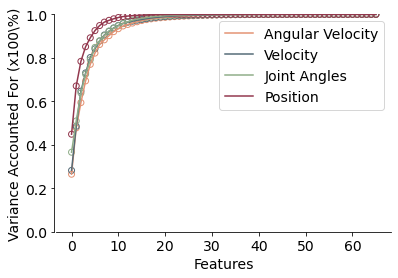

In [13]:
col_sc = ['#E49273', '#546A76', '#8FAD88', '#92374D']

ylims = np.arange(66)
plt.plot(vaf_avz, label='Angular Velocity', color='#E49273')
plt.scatter(ylims, vaf_avz, facecolors='none', edgecolors='#E49273')
plt.plot(vaf_vz, label='Velocity', color='#546A76')
plt.scatter(ylims, vaf_vz, facecolors='none', edgecolors='#546A76')
plt.plot(vaf_jz, label='Joint Angles', color='#8FAD88')
plt.scatter(ylims, vaf_jz, facecolors='none', edgecolors='#8FAD88')
plt.plot(vaf_pz, label='Position', color='#92374D')
plt.scatter(ylims, vaf_pz, facecolors='none', edgecolors='#92374D')
plt.xlabel("Features", fontsize=14)
plt.ylabel("Variance Accounted For (x100\%)", fontsize=14)
ylimz = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 , 1.0]
xlimz = [0, 10, 20, 30, 40, 50, 60]

plt.yticks(fontsize=14)
plt.xticks(xlimz, fontsize=14)
plt.ylim(0,1)
# sns.spine['top'].set_visible(False)
# sns.spine['right'].set_visible(False)
sns.despine(offset={'left': 2})
plt.legend()
plt.show()


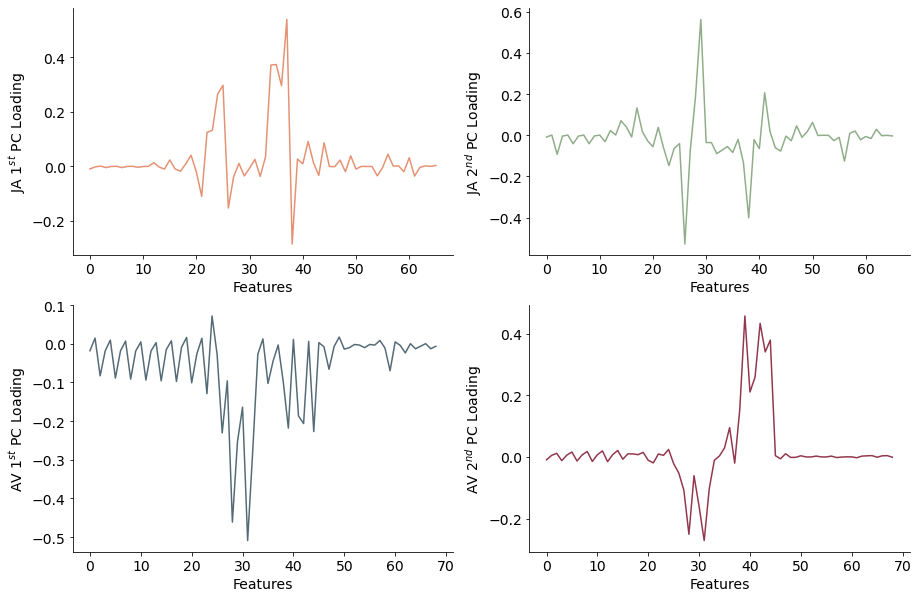

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0,0].plot(comps_j[0], color=col_sc[0])
axs[0,0].set_xlabel('Features')
axs[0,0].set_ylabel('JA $1^{st}$ PC Loading', fontsize=14)
axs[0,0].spines['right'].set_visible(False)
axs[0,0].spines['top'].set_visible(False)

axs[0,1].plot(comps_j[1], color=col_sc[2])
axs[0,1].set_xlabel('Features', fontsize=14)
axs[0,1].set_ylabel('JA $2^{nd}$ PC Loading', fontsize=14)
axs[0,1].spines['right'].set_visible(False)
axs[0,1].spines['top'].set_visible(False)

axs[1,0].plot(comps_av[0], color=col_sc[1])
axs[1,0].set_xlabel('Features', fontsize=14)
axs[1,0].set_ylabel('AV $1^{st}$ PC Loading', fontsize=14)
axs[1,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)

axs[1,1].plot(comps_av[1], color=col_sc[3])
axs[1,1].set_xlabel('Features', fontsize=14)
axs[1,1].set_ylabel('AV $2^{nd}$ PC Loading', fontsize=14)
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)


In [15]:
signal = angVel_data
mean = np.mean(signal, axis=0)
sig_zero = signal - mean

seq_av, av_recon, score_av, error_av = test_eigenmotions_omp(signal, comps_avz)
seq_avz, avz_recon, score_avz, error_avz = test_eigenmotions_omp(sig_zero, comps_avz)
seq_avs, avs_recon, score_avs, error_avs = test_eigenmotions_omp(sig_sca, comps_avs)
seq_avn, avn_recon, score_avn, error_avn = test_eigenmotions_omp(signal, comps_avn)

scores = [score_av, error_av, score_avz, error_avz, score_avs, error_avs, score_avn, error_avn]
errors = [error_av, error_avz, error_avs, error_avn]

In [16]:
signal = angVel_data
mean = np.mean(signal, axis=0)
sig_zero_ang = signal - mean

signal = vel_data
mean = np.mean(signal, axis=0)
sig_zero_v = signal - mean

signal = joint_data
mean = np.mean(signal, axis=0)
sig_zero_j = signal - mean

signal = pos_data
mean = np.mean(signal, axis=0)
sig_zero_p = signal - mean

seq_avz, avz_recon, score_avz, error_avz = test_eigenmotions_omp(sig_zero_ang, comps_avz)
seq_avs, avs_recon, score_avs, error_avs = test_eigenmotions_omp(sig_zero_v, comps_vz)
seq_avn, avn_recon, score_avn, error_avn = test_eigenmotions_omp(sig_zero_j, comps_jz)
seq_avf, avf_recon, score_avf, error_avf = test_eigenmotions_omp(sig_zero_p, comps_pz)

scores = [score_avz, error_avz, score_avs, error_avs, score_avn, error_avn, score_avf, error_avf]

In [17]:
transAV, avz_recon, score_avz, error_avz = test_eigenmotions_lasso_lars(sig_zero_ang, comps_avz, t_alpha=0.5)
seq, avs_recon, score_avs, error_avs = test_eigenmotions_omp(sig_zero_ang, comps_avz)
transJA, avn_recon, score_avn, error_avn = test_eigenmotions_lasso_lars(sig_zero_j, comps_jz, t_alpha=0.5, dims=66)
sqe, avf_recon, score_avf, error_avf = test_eigenmotions_omp(sig_zero_j, comps_jz)

avg_nonzero_av = len(np.nonzero(transAV)[0])/len(sig_zero_ang)
avg_nonzero_j = len(np.nonzero(transJA)[0])/len(sig_zero_j)

print(avg_nonzero_av)
print(avg_nonzero_j)

scores = [score_avf, error_avf, score_avs, error_avs, score_avn, error_avn, score_avz, error_avz]

2.3575988048349856
28.254108379736522


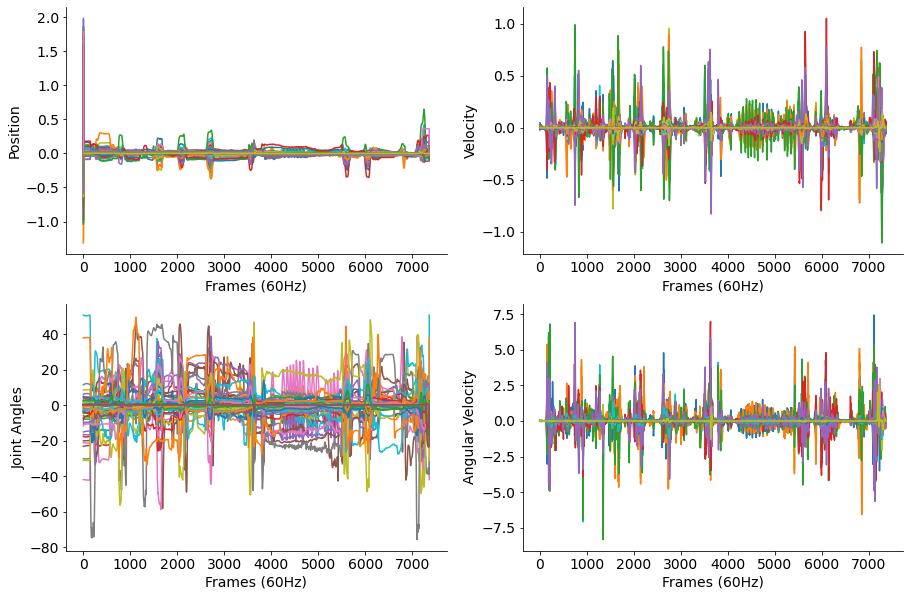

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0,0].plot(sig_zero_p)
axs[0,0].set_xlabel('Frames (60Hz)')
axs[0,0].set_ylabel('Position', fontsize=14)
axs[0,0].spines['right'].set_visible(False)
axs[0,0].spines['top'].set_visible(False)

axs[0,1].plot(sig_zero_v)
axs[0,1].set_xlabel('Frames (60Hz)', fontsize=14)
axs[0,1].set_ylabel('Velocity', fontsize=14)
axs[0,1].spines['right'].set_visible(False)
axs[0,1].spines['top'].set_visible(False)

axs[1,0].plot(sig_zero_j)
axs[1,0].set_xlabel('Frames (60Hz)', fontsize=14)
axs[1,0].set_ylabel('Joint Angles', fontsize=14)
axs[1,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)

axs[1,1].plot(sig_zero_ang)
axs[1,1].set_xlabel('Frames (60Hz)', fontsize=14)
axs[1,1].set_ylabel('Angular Velocity', fontsize=14)
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)

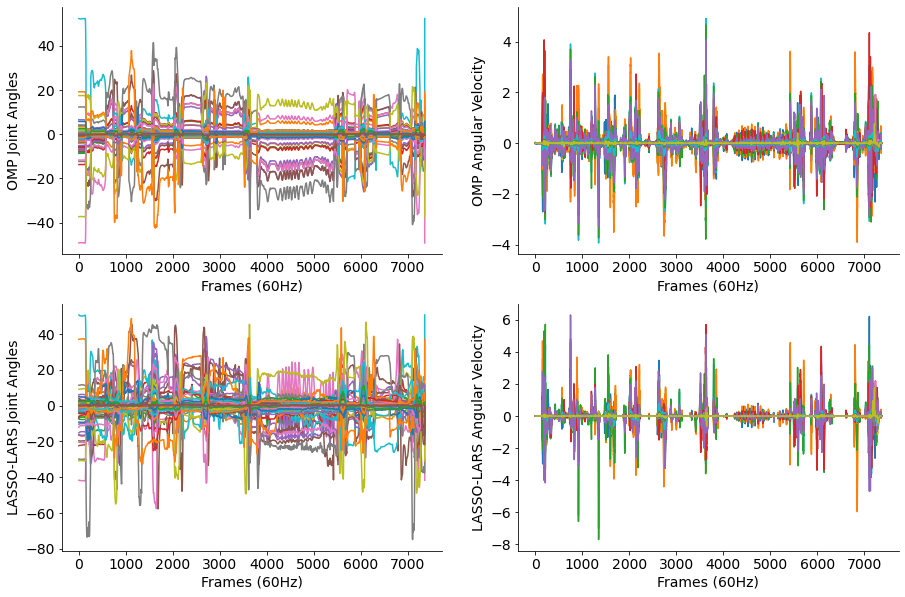

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0,0].plot(avf_recon)
axs[0,0].set_xlabel('Frames (60Hz)')
axs[0,0].set_ylabel('OMP Joint Angles', fontsize=14)
axs[0,0].spines['right'].set_visible(False)
axs[0,0].spines['top'].set_visible(False)

axs[0,1].plot(avs_recon)
axs[0,1].set_xlabel('Frames (60Hz)', fontsize=14)
axs[0,1].set_ylabel('OMP Angular Velocity', fontsize=14)
axs[0,1].spines['right'].set_visible(False)
axs[0,1].spines['top'].set_visible(False)

axs[1,0].plot(avn_recon)
axs[1,0].set_xlabel('Frames (60Hz)', fontsize=14)
axs[1,0].set_ylabel('LASSO-LARS Joint Angles', fontsize=14)
axs[1,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)

axs[1,1].plot(avz_recon)
axs[1,1].set_xlabel('Frames (60Hz)', fontsize=14)
axs[1,1].set_ylabel('LASSO-LARS Angular Velocity', fontsize=14)
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)

C:\Users\abdul\AppData\Local\Temp\ipykernel_15940\2944071480.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  arr.set_yticklabels(y_ticks, fontsize=14)


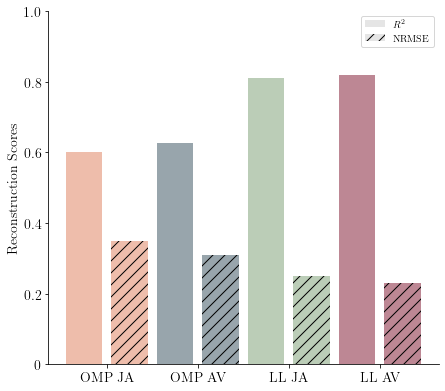

In [9]:
scores = [0.61, 0.27, 0.657, 0.24, 0.82, 0.2, 0.85, 0.22]

rc('text', usetex=True) 
hatches = ['', '//', '', '//', '', '//', '', '//']
colors = ['#E49273','#E49273','#546A76','#546A76','#8FAD88','#8FAD88','#92374D','#92374D']
f, arr = plt.subplots(1)
f.set_size_inches(7,6.5)
x_pos = np.arange(8)
y_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
x_mids = [0.5, 2.5, 4.5, 6.5]
x_words = ['OMP JA', 'OMP AV', 'LL JA', 'LL AV']

arr.bar(x_pos, scores, color = colors, hatch=hatches, alpha=0.6)

arr.set_xticks(x_mids, x_words, fontsize=14)
arr.spines['right'].set_visible(False)
arr.spines['top'].set_visible(False)
arr.set_ylabel('Reconstruction Scores', fontsize=14)
arr.set_yticklabels(y_ticks, fontsize=14)
arr.set_ylim(0,1)
#arr.tick_params(labelbottom=False)
leg1 = mpatches.Patch(facecolor = "#808080", alpha=0.2, hatch="", label="$R^2$")
leg2 = mpatches.Patch(facecolor = "#808080", alpha=0.2, hatch="//", label="NRMSE")

arr.legend(handles=[leg1, leg2], fontsize=10)



62
This is the shape of the input data: (7363, 69)


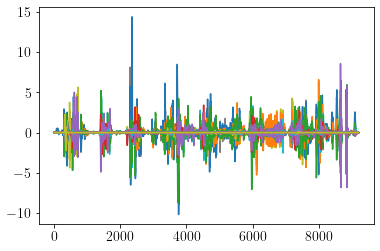

9195


In [27]:
rel_path = 'input_data/AngVel_Data.csv'

rel_novice = 'input_data/EVDSessionLayperson-002.mvnx'

# 'output_data/eigenaction_angvel_fulltest.pickle' for eigenaction dictionary with the length of the dataset as the training data
# 'output_data/eigenaction_angvel_test.pickle' for eigenaction dictionary with 5000 datapoints as the training data

abs_output_path = 'output_data/eigenaction_angvel_test.pickle'

with open(abs_output_path, "rb") as fp:
    eigen_dict_ang = pickle.load(fp)
print(len(eigen_dict_ang))


actions = np.genfromtxt(rel_path, delimiter=',')
actions_check = np.array(actions)
print("This is the shape of the input data: "+ str(actions_check.shape))
data_vel = actions
mean = np.mean(data_vel,axis=0)
data_vel = data_vel - mean

novice_actions = mvnx.load(rel_novice)

novice_ang = novice_actions.angularVelocity
mean_ang = np.mean(novice_ang, axis=0)

novice_ang = novice_ang - mean_ang

plt.plot(novice_ang)
plt.show()
print(len(novice_ang))

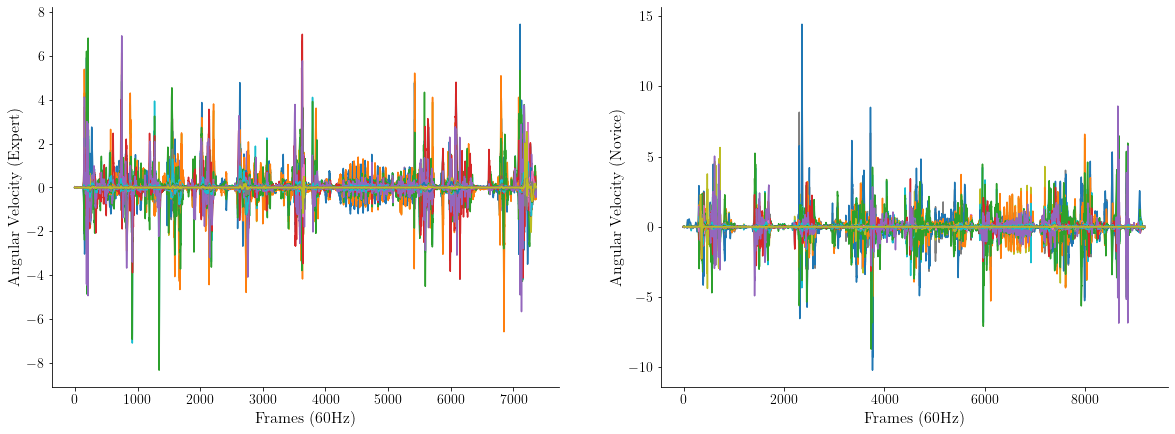

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(20,7))

axs[0].plot(data_vel)
axs[0].set_xlabel('Frames (60Hz)', fontsize=16)
axs[0].set_ylabel('Angular Velocity (Expert)', fontsize=16)
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)

axs[1].plot(novice_ang)
axs[1].set_xlabel('Frames (60Hz)', fontsize=16)
axs[1].set_ylabel('Angular Velocity (Novice)', fontsize=16)
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)


In [22]:
with open("./eigen_dict_angVel.pickle", "rb") as fp:
    eigen_dict_ang = pickle.load(fp)
eigen_dict_ang = np.array(eigen_dict_ang)


with open("./eigen_dict_angzero.pickle", "rb") as fp:
    eigen_dict_angzero = pickle.load(fp)
eigen_dict_angzero = np.array(eigen_dict_angzero)


with open("./eigen_dict_joint.pickle", "rb") as fp:
    eigen_dict_joint = pickle.load(fp)
eigen_dict_joint = np.array(eigen_dict_joint)


with open("./eigen_dict_jointzero.pickle", "rb") as fp:
    eigen_dict_jointzero = pickle.load(fp)
eigen_dict_jointzero = np.array(eigen_dict_jointzero)
    

In [23]:
signal = joint_data
mean = np.mean(signal, axis=0)
j_data = signal - mean

signal = angVel_data
mean = np.mean(signal, axis=0)
av_data = signal - mean

scores_angz, vaf_sums = test_eigenmotions_omp_vaf(angVel_data, eigen_dict_ang)
print(np.argmax(vaf_scores))
print(vaf_scores)

scores_ang, vaf_sums = test_eigenmotions_omp_vaf(av_data, eigen_dict_angzero)
print(np.argmax(vaf_scores))
print(vaf_scores)

scores_j, vaf_sums = test_eigenmotions_omp_vaf(joint_data, eigen_dict_joint)
print(np.argmax(vaf_scores))
print(vaf_scores)

scores_jz, vaf_sums = test_eigenmotions_omp_vaf(j_data, eigen_dict_jointzero)
print(np.argmax(vaf_scores))
print(vaf_scores)





NameError: name 'vaf_scores' is not defined

In [61]:
copy = np.sort(scores_angz)[::-1]
for i in range(len(copy)):
        if(i == 0):
            copy[i] = copy[i]
        else:
            copy[i] = copy[i] + copy[i-1]
        if(copy[i]>=1):
            copy[i]=1
angz = copy

copy = np.sort(scores_ang)[::-1]
for i in range(len(copy)):
        if(i == 0):
            copy[i] = copy[i]
        else:
            copy[i] = copy[i] + copy[i-1]
        if(copy[i]>=1):
            copy[i]=1
ang = copy

copy = np.sort(scores_j)[::-1]
for i in range(len(copy)):
        if(i == 0):
            copy[i] = copy[i]
        else:
            copy[i] = copy[i] + copy[i-1]
        if(copy[i]>=1):
            copy[i]=1
j = copy

copy = np.sort(scores_jz)[::-1]
for i in range(len(copy)):
        if(i == 0):
            copy[i] = copy[i]
        else:
            copy[i] = copy[i] + copy[i-1]
        if(copy[i]>=1):
            copy[i]=1
jz = copy




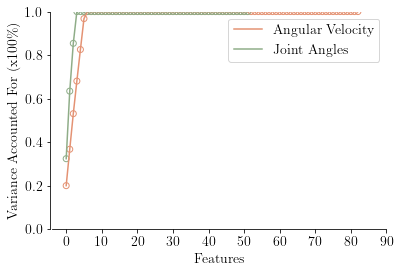

In [66]:
ylims = np.arange(len(angz))
plt.plot(angz, label='Angular Velocity', color='#E49273')
plt.scatter(ylims, angz, facecolors='none', edgecolors='#E49273')
ylims = np.arange(len(jz))
plt.plot(jz, label='Joint Angles', color='#8FAD88')
plt.scatter(ylims, jz, facecolors='none', edgecolors='#8FAD88')

plt.xlabel("Features", fontsize=14)
plt.ylabel("Variance Accounted For (x100\%)", fontsize=14)
ylimz = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 , 1.0]
xlimz = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

plt.yticks(fontsize=14)
plt.xticks(xlimz, fontsize=14)
plt.ylim(0,1)
# sns.spine['top'].set_visible(False)
# sns.spine['right'].set_visible(False)
sns.despine(offset={'left': 2})
plt.legend()
plt.show()

In [68]:
poop, peep, pp, plp = test_eigenmotions_omp(av_data, eigen_dict_angzero)
po, pep, psp, plsp = test_eigenmotions_lasso_lars(av_data, eigen_dict_angzero)

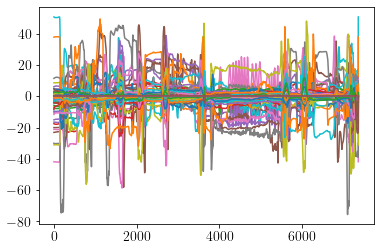

KeyboardInterrupt: 

In [23]:

dict_learner = DictionaryLearning(n_components=50, alpha=1, transform_algorithm='lasso_lars', transform_alpha=0.05, random_state=42)

signal = joint_data
mean = np.mean(signal, axis=0)
j_data = signal - mean

joints = j_data
plt.plot(joints)
plt.show()
joint_fit = dict_learner.fit(joints)
#dict_learner.components_ = comps
joint_transformed = dict_learner.transform(joints)

X_hat = joint_transformed @ dict_learner.components_
error = np.mean(np.sum((X_hat - joints) ** 2, axis=1) / np.sum(joints ** 2, axis=1))
recon = calculate_reconstruction_score(joints, X_hat)

plt.plot(X_hat)
plt.show()

print(error)
print(recon)



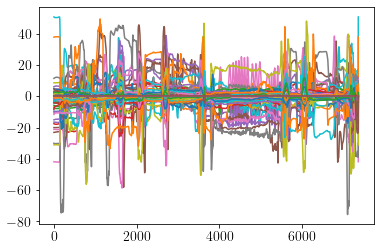

KeyboardInterrupt: 

In [250]:
dict_learner = DictionaryLearning(n_components=69, transform_algorithm='omp', random_state=42, transform_n_nonzero_coefs=1)

signal = joint_data
mean = np.mean(signal, axis=0)
j_data = signal - mean

joints = j_data
plt.plot(joints)
plt.show()
joint_fit = dict_learner.fit(joints)
#dict_learner.components_ = comps
joint_transformed = dict_learner.transform(joints)

X_hat = joint_transformed @ dict_learner.components_
error = np.mean(np.sum((X_hat - joints) ** 2, axis=1) / np.sum(joints ** 2, axis=1))
recon = calculate_reconstruction_score(joints, X_hat)

plt.plot(X_hat)
plt.show()

print(error)
print(recon)



In [17]:
dat = {'Size' : [], 'Wins' : [], 'Sigs' : [], 'OR' : [], 'OE' : [], 'LR' : [], 'LE' : []}
db = pd.DataFrame(dat)
da = {'Size' : 12, 'Wins' : 102, 'Sigs' : 0.2, 'OR' : 0.2, 'OE' : 0.5, 'LR' : 0.3, 'LE' : 0.4}
db = db.append(da, ignore_index=True)
print(db)
db.to_pickle("./tester.pkl")

   Size   Wins  Sigs   OR   OE   LR   LE
0  12.0  102.0   0.2  0.2  0.5  0.3  0.4


In [18]:
udb = pd.read_pickle("./tester.pkl")
print(udb)

   Size   Wins  Sigs   OR   OE   LR   LE
0  12.0  102.0   0.2  0.2  0.5  0.3  0.4


In [1]:
gs_results = pd.read_pickle("./grids.pkl")
show(gs_results)

NameError: name 'pd' is not defined

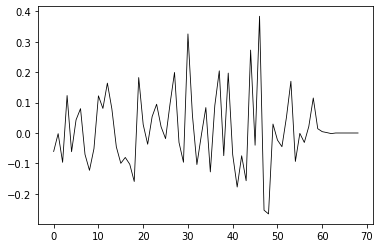

0.6723866099002651


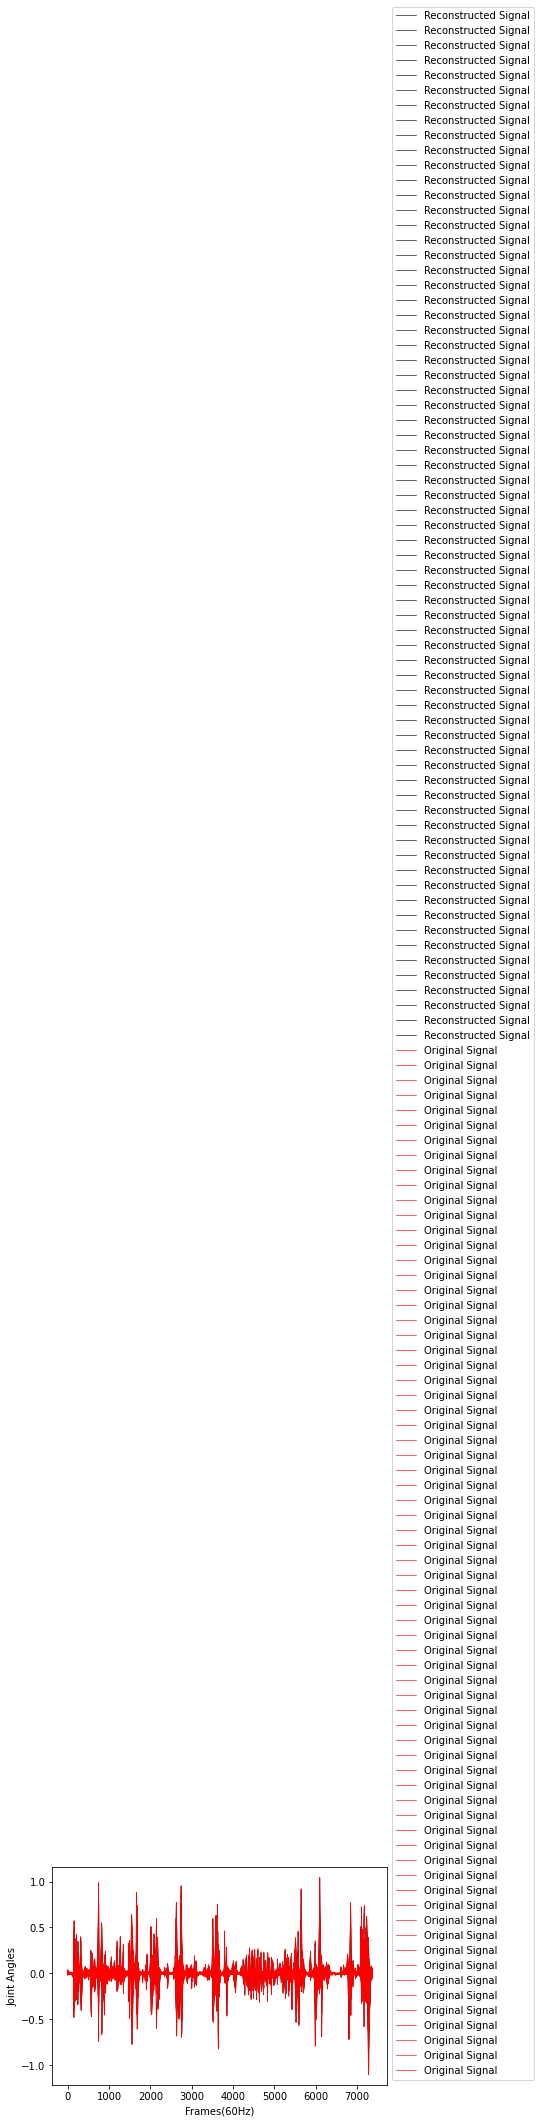

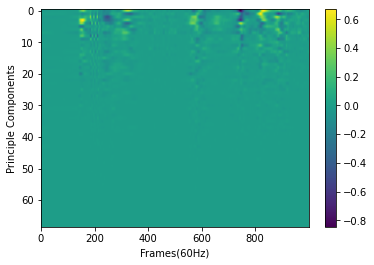

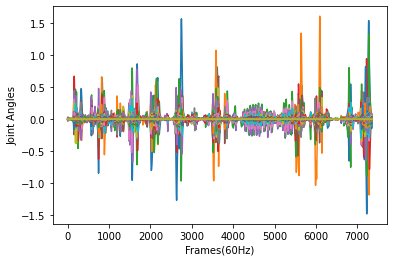

0.09197121323308405


In [ ]:
plt.plot(dict_learner.components_[:,0], c='k', linewidth=0.8)
#plt.plot(joint28, c='r', linewidth=0.4)
plt.show()

comp = dict_learner.components_

print(np.mean(joint_transformed == 0))

X_hat = joint_transformed @ dict_learner.components_
plt.plot(X_hat, c='k', linewidth=0.6, label="Reconstructed Signal")
plt.plot(joints, c='r', linewidth=0.6, label="Original Signal")
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
plt.xlabel('Frames(60Hz)')
plt.ylabel('Joint Angles')
plt.show()

plt.imshow(joint_transformed[0:1000,:].T, aspect='auto')
plt.colorbar()

plt.xlabel('Frames(60Hz)')
plt.ylabel('Principle Components')
plt.show()
plt.plot(joint_transformed)
plt.xlabel('Frames(60Hz)')
plt.ylabel('Joint Angles')
plt.show()
error = np.mean(np.sum((X_hat - joints) ** 2, axis=1) / np.sum(joints ** 2, axis=1))
print(error)

In [ ]:
# %% Reference from MVN Documentation 
#-1 from all indices for python, and indices NOT for quaternions e.g orientation
# % 'Pelvis/jL5S1'	1,2,3         
# % 'L5/jL4L3'	4,5,6
# % 'L3/jL4L3'	7,8,9
# % 'T12/jT9T8'	10,11,12
# % 'T8/jT1C7'	13,14,15
# % 'Neck/jC1Head'	16,17,18
# % 'T8/jRightT4Shoulder'	19,20,21
# % 'RightShoulder/jRightShoulder'	22,23,24
# % 'RightUpperArm/jRightElbow'	25,26,27
# % 'RightForeArm/jRightWrist'	28,29,30
# % 'T8/jLeftT4Shoulder'	31,32,33
# % 'LeftShoulder/jLeftShoulder'	34,35,36
# % 'LeftUpperArm/jLeftElbow'	37,38,39
# % 'LeftForeArm/jLeftWrist'	40,41,42
# % 'Pelvis/jRightHip'	43,44,45
# % 'RightUpperLeg/jRightKnee'	46,47,48
# % 'RightLowerLeg/jRightAnkle'	49,50,51
# % 'RightFoot/jRightBallFoot'	52,53,54
# % 'Pelvis/jLeftHip'	55,56,57
# % 'LeftUpperLeg/jLeftKnee'	58,59,60
# % 'LeftLowerLeg/jLeftAnkle'	61,62,63
# % 'LeftFoot/jLeftBallFoot'	64,65,66